In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

adding more realisitc layers

In [16]:
data = {
    'size_sqft': [1184, 1059, 2153, 1716, 1335, 1263, 2231, 1883, 1533, 2247],
    'rooms':     [3, 5, 1, 1, 5, 3, 2, 1, 2, 2],
    'age':       [13, 8, 9, 20, 19, 16, 19, 5, 15, 15],
    'price':     [226246, 259593, 415531, 321573, 283365, 253544, 430910, 419244, 273480, 429729]
}

df = pd.DataFrame(data)
X = df[['size_sqft', 'rooms', 'age']]
y = df['price']
df.head()

,size_sqft,rooms,age,price
0,1184,3,13,226246
1,1059,5,8,259593
2,2153,1,9,415531
3,1716,1,20,321573
4,1335,5,19,283365


In [17]:
df.describe()

,size_sqft,rooms,age,price
count,10.00000,10.000000,10.000000,10.000000
mean,1660.40000,2.500000,13.900000,331321.500000
std,451.37597,1.509231,5.108816,83266.097857
min,1059.00000,1.000000,5.000000,226246.000000
25%,1281.00000,1.250000,10.000000,263064.750000
50%,1624.50000,2.000000,15.000000,302469.000000
75%,2085.50000,3.000000,18.250000,418315.750000
max,2247.00000,5.000000,20.000000,430910.000000


In [18]:
#drop missing values
df.dropna(axis=1)

,size_sqft,rooms,age,price
0,1184,3,13,226246
1,1059,5,8,259593
2,2153,1,9,415531
3,1716,1,20,321573
4,1335,5,19,283365
5,1263,3,16,253544
6,2231,2,19,430910
7,1883,1,5,419244
8,1533,2,15,273480
9,2247,2,15,429729


In [19]:
# create a prediction data variable
y = df.price

In [20]:
# selecting features for predictions
features = ["size_sqft","rooms","age"]
X = df[features]

In [21]:
X.describe()

,size_sqft,rooms,age
count,10.00000,10.000000,10.000000
mean,1660.40000,2.500000,13.900000
std,451.37597,1.509231,5.108816
min,1059.00000,1.000000,5.000000
25%,1281.00000,1.250000,10.000000
50%,1624.50000,2.000000,15.000000
75%,2085.50000,3.000000,18.250000
max,2247.00000,5.000000,20.000000


In [22]:
X.head()

,size_sqft,rooms,age
0,1184,3,13
1,1059,5,8
2,2153,1,9
3,1716,1,20
4,1335,5,19


now, make a model (Linear regression)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42) #70% training data of of 10 rows

see which data is for training

In [24]:
print("Let's pick 70% for training, that 70% can be from any random rows\n")
print(f'Training data features: \n{X_train}\n')
print(f'Training data actual price: \n{y_train}\n')

Let's pick 70% for training, that 70% can be from any random rows

Training data features: 
   size_sqft  rooms  age
0       1184      3   13
7       1883      1    5
2       2153      1    9
9       2247      2   15
4       1335      5   19
3       1716      1   20
6       2231      2   19

Training data actual price: 
0    226246
7    419244
2    415531
9    429729
4    283365
3    321573
6    430910
Name: price, dtype: int64



data for Testing

In [25]:
print("Let's pick 30% for testing, that 30% can be from any random rows\n")
print(f'Testing data features: \n{X_test}\n')
print(f'Testing data actual price: \n{y_test}\n')

Let's pick 30% for testing, that 30% can be from any random rows

Testing data features: 
   size_sqft  rooms  age
8       1533      2   15
1       1059      5    8
5       1263      3   16

Testing data actual price: 
8    273480
1    259593
5    253544
Name: price, dtype: int64



In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #import model

In [27]:
model.fit(X_train,y_train) #fit training data
# get the value of m and b, slope and intercept
print(f'Value of m which is slope: {model.coef_}')
print(f'Value of b which is intercept: {model.intercept_}')

Value of m which is slope: [  194.7683333   7061.31018492 -3101.85153889]
Value of b which is intercept: 35394.57427248865


here we “used” m and b in scikit-learn, but how?

Ans:- scikit-learn automatically calculates (m values) and (b)

Behind the scenes, it uses the formula::- ypred​=m1​⋅x1​+m2​⋅x2​+m3​⋅x3​+b

In [28]:
y_predict = model.predict(X_test)

compare our model's predictions with actual values

In [29]:
print(f'Actual price of 30% testing data (Also mentioned abvove): \n{y_test}\n')
print(f'Predicted price: \n{y_predict.reshape(-1,1)}') #reshaping to show in one column (optional)
print("We can note that the predicted price for each row in Actual Price data is little bit different")

Actual price of 30% testing data (Also mentioned abvove): 
8    273480
1    259593
5    253544
Name: price, dtype: int64

Predicted price: 
[[301569.27650381]
 [252145.97784785]
 [252941.28515956]]
We can note that the predicted price for each row in Actual Price data is little bit different


Instead of manually calculating differnece, we can Evaluate by MSE/R square

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_predict), ",this the average price difference of all 3 rows in actual and predicted values")
print("R²:", r2_score(y_test, y_predict), ",this shows how well the model explains the variation in the data, Range: 0 to 1 (can be negative if model is very bad)")

if (r2_score(y_test, y_predict) < 0):
    print("Our model is very bad, the R square is less than 0, we need to now tune/optimize model")

MSE: 281609619.54025155 ,this the average price difference of all 3 rows in actual and predicted values
R²: -3.0429960621444696 ,this shows how well the model explains the variation in the data, Range: 0 to 1 (can be negative if model is very bad)
Our model is very bad, the R square is less than 0, we need to now tune/optimize model


Let's improvde model by Feature Engineering:-
You create new columns (features) or transform existing ones to give the model more useful information.
Feature Engineering works best when the new feature has a logical connection to the target variable.


For example:- Original features are (size_sqft, rooms).

Possible engineered features: size_per_room = size_sqft / rooms

Why useful:- Bigger rooms per sqft may affect price  

NOTE:- Feature engineering is not random, it’s creating meaningful features derived from existing data.

In [31]:
df['size_per_room'] = df['size_sqft'] / df['rooms'] #created feature based data
X_new = df[['size_sqft', 'rooms', 'age', 'size_per_room']]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7, random_state=42)

Now, we can train model with the new feature added

In [32]:
model_new = LinearRegression()
model_new.fit(X_train, y_train)
y_predict_new = model_new.predict(X_test)

mse_new = mean_squared_error(y_test, y_predict_new)
r2_new = r2_score(y_test, y_predict_new)

print("\nAfter Feature Engineering:")
print("MSE:", mse_new)
print("R²:", r2_new)


After Feature Engineering:
MSE: 148758498.9358194
R²: -1.1356870776996852


Let's compare model before and after feature engineering now

In [33]:
print(f'Actual price of 30% testing data (Also mentioned abvove): \n{y_test}\n')
print(f'Old predictions:- {y_predict}')
print(f'New Predictions:- {y_predict_new}')

Actual price of 30% testing data (Also mentioned abvove): 
8    273480
1    259593
5    253544
Name: price, dtype: int64

Old predictions:- [301569.27650381 252145.97784785 252941.28515956]
New Predictions:- [292644.65228269 254434.48689501 246306.50442234]


clearly visible ABOVE that the new model is performing better now after adding new feature

Now, we can visualize, comparing both models

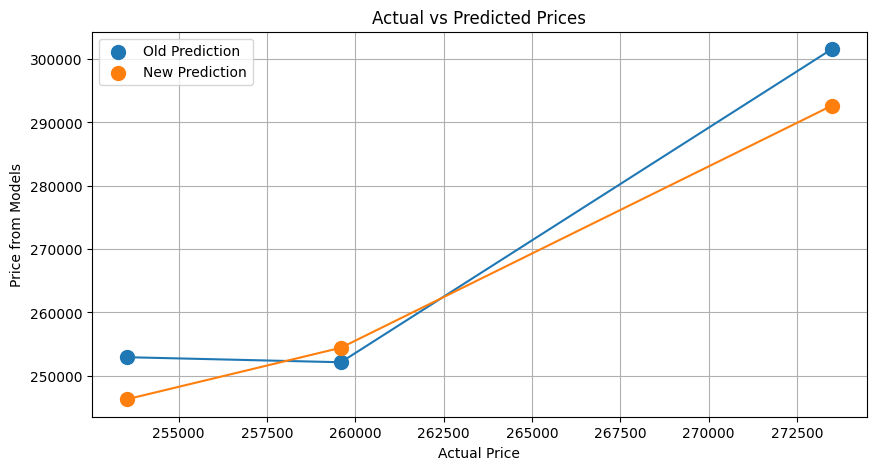

In [34]:
x = y_test #y_test has the 30% testing data, so we need to put that in X-axis

plt.figure(figsize=(10,5))
plt.plot(x, y_predict)
plt.scatter(x, y_predict, label="Old Prediction", s=100)

plt.plot(x, y_predict_new)
plt.scatter(x, y_predict_new, label="New Prediction", s=100)

plt.xlabel("Actual Price")
plt.ylabel("Price from Models")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()
